In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
#trajectory3: delta = .40
#trajectory1: delta = .05 
#trajectory2: delta= .05, tau=5
traj = np.load('trajs/trajectory_Ldist_tau500_phi01_eps01_bara') # trajectory_Ldist_tau500_phi01_eps01
delta=6
tau=500

In [46]:
traj.tail()

,wage,r,s,capital,labor share of gdp,C,P,Y,consensus
time,,,,,,,,,
199976.561043,5.153594,0.048510,"[0.897402008221, 0.0445231693319, 0.0579113952...","[7.79000459127, 0.0492330477597, 0.06340471660...",5.156568,"[0.0440520796045, 0.0527657385816, 0.051514717...","[0.00967990866826, 0.0102517868138, 0.01001287...",10.313137,False
199978.594489,5.161225,0.048438,"[0.897402008221, 0.0445231693319, 0.0579113952...","[7.77853224707, 0.0492274199134, 0.06339768011...",5.164204,"[0.0438394379156, 0.052834553852, 0.0515792781...","[0.00967990866826, 0.0102517868138, 0.01001287...",10.328408,False
199981.414776,5.167470,0.048380,"[0.897402008221, 0.0445231693319, 0.0579113952...","[7.76167187213, 0.0492292440027, 0.06339995645...",5.170452,"[0.0437419083834, 0.0528927130043, 0.051634371...","[0.00967990866826, 0.0102517868138, 0.01001287...",10.340905,False
199998.624031,5.215407,0.047935,"[0.897402008221, 0.0445231693319, 0.0579113952...","[7.63167372083, 0.0494638745232, 0.06369357224...",5.218418,"[0.0433517147157, 0.0533414436695, 0.052060108...","[0.00967990866826, 0.0102517868138, 0.01001287...",10.436835,False
200008.046603,5.256011,0.047565,"[0.897402008221, 0.0445231693319, 0.0579113952...","[7.54735424587, 0.0496586396674, 0.06393911738...",5.259045,"[0.0424627543817, 0.0537324214482, 0.052434168...","[0.00967990866826, 0.0102517868138, 0.01001287...",10.518090,False


In [10]:
N=100
size = 50000 #len(traj.index)
S = np.zeros(shape=(size, N))
K = np.zeros(shape=(size, N))
C = np.zeros(shape=(size, N))
w = np.zeros(shape=(size, 1))
r = np.zeros(shape=(size,1))
L = traj['P'][0]
y = np.zeros(shape=(size,1))
idx = traj.index[0:size]
for a, t in enumerate(traj.index[0:size]):
    S[a,:] = traj['s'][t]
    C[a,:] = traj['C'][t]
    K[a,:] = traj['capital'][t]
    w[a,:] = traj['wage'][t]
    r[a,:] = traj['wage'][t]
    y[a,:] = traj['Y'][t]
del traj
        


30000 50000


NameError: name 'W' is not defined

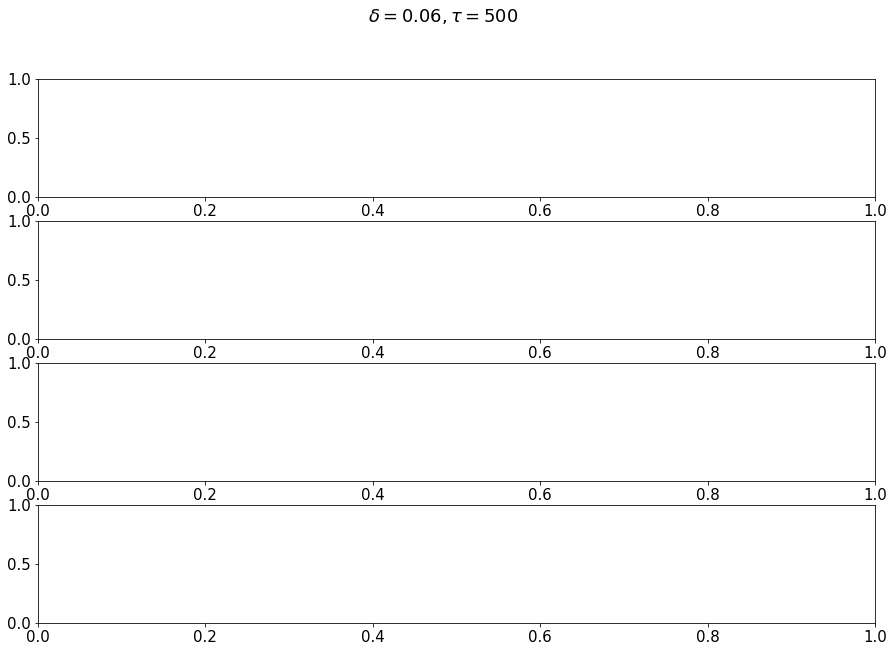

In [14]:
# plot all individual dynamics
plt.rc('font', size=15)  
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,figsize=(15,10))

plt.suptitle(r'$\delta=%s, \tau=%s$'%(np.round(delta/100.,2),tau))
start, stop = 30000,50000#len(traj['r'])-1000, len(traj['r']) # 10000
print start, stop
Lim=0.05

kidotzero = W[start:stop,:]/(((delta/100. )/S[start:stop,:]) -traj['r'].values[start:stop][:,None])
kidotzero/=N
kidotzero_low = kidotzero*(kidotzero<Lim)
kidotzero_high = kidotzero*(kidotzero>=Lim)
fig.subplots_adjust(hspace = .8, wspace=.01);



for a,i in enumerate(range(N)):
#     ax1.plot(traj.index[start:stop],S[start:stop,i]* (traj['r'].values[start:stop] * K[start:stop,i] +\
#                                                       traj['wage'].values[start:stop] *L[i])/ traj['Y'].values[start:stop], 
#              c=plt.cm.spectral(float(a+1) / N), alpha=0.55);
    ax1.set_ylabel(r'Savings rate $s_i$')
    ax2.plot(traj.index[start:stop],K[start:stop,i], 
             c=plt.cm.spectral(float(a+1) / N),alpha=0.55);
    ax2.set_ylabel(r'Capital $K_i$')
    ax3.plot(traj.index[start:stop],C[start:stop,i], 
    #ax3.plot(traj.index[start:stop], traj['r'].values[start:stop] * S[start:stop,i] - delta/100. +\
     #         traj['wage'].values[start:stop] * L[i] * S[start:stop,i],
             c=plt.cm.spectral(float(a+1) / N),alpha=0.55);
    ax3.set_ylabel(r'Consumption $C_i$')


ax1.plot(traj.index[start:stop], (S[start:stop,:]* (traj['r'].values[start:stop][:,None] * K[start:stop,:] +\
                                                  traj['wage'].values[start:stop][:,None] *L[:][:,None])).sum(1)/ \
                                  traj['Y'].values[start:stop][:,None] )
#          c=plt.cm.spectral(float(a+1) / N), alpha=0.55);    
    
    
ax1.legend()
ax1.set_ylim((0,1))
ax3.legend()
# ax2.plot(np.array(traj.index[start:stop])[np.nonzero(kidotzero_high)[0]],
#     kidotzero_high[np.nonzero(kidotzero_high)],
#     'k',lw=3,label=r'$\dot{K}_i=0$');
# ax2.plot(np.array(traj.index[start:stop])[np.nonzero(kidotzero_low)[0]],
#     kidotzero_low[np.nonzero(kidotzero_low)],
#     'k',lw=3,label=r'$\dot{K}_i=0$');

from collections import OrderedDict
handles, labels = ax2.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax2.legend(by_label.values(), by_label.keys(),loc='upper right',ncol=2)
#ax2.set_yscale('log')
#ax3.set_yscale('log')

#ax2.set_ylim(0,9)


ax4.plot(traj.index[start:stop],K[start:stop,:].sum(1),c='b');
ax4.set_ylabel('Aggreg. K')

ax5 = ax4.twinx();
ax5.plot(traj.index[start:stop],traj['r'].values[start:stop],c='g');
ax5.plot(traj.index[start:stop],delta/100. +0*traj.index[start:stop],
         'k--',label=r'$\delta$');

ax5.legend(loc='upper right')
ax5.set_ylabel('Interest rate')
ax5.tick_params(axis='y', colors='g')
ax4.tick_params(axis='y', colors='b')
ax4.set_xlabel('timesteps')
#fig.savefig('delta_%s_start%s_stop%s_eps01_phi01_k.pdf'%(delta,start,stop))


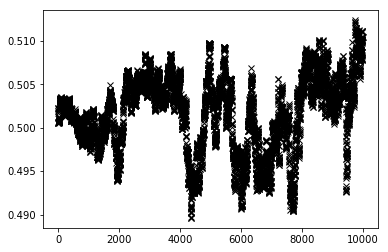

In [12]:
start=40000
stop =50000
sincome = S[start:stop,:]* (r[start:stop] * K[start:stop,:] +\
                            w[start:stop] *L[:])

income = (r[start:stop] * K[start:stop,:] +\
                            w[start:stop] *L[:])

plt.plot(np.arange(10000),(sincome.sum(1) / income.sum(1)),'kx')

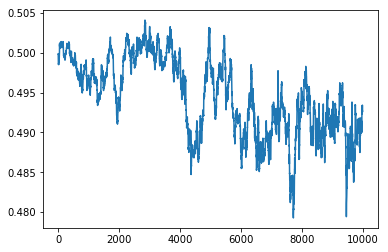

In [13]:
plt.plot(S[start:stop,:].mean(1))

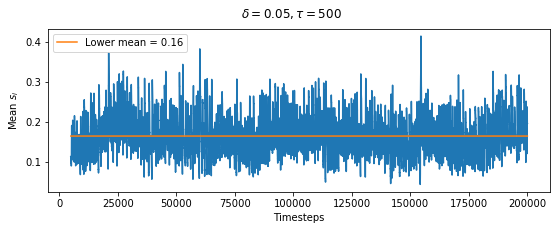

In [67]:
fig, ax = plt.subplots(figsize=(9,3))
plt.suptitle(r'$\delta=%s, \tau=%s$'%(np.round(delta/100.,2),tau))
start, stop = 1000, len(traj.index)
#ax.plot(traj.index[start:stop], S[start:stop].mean(1))

#ax.plot(traj.index[start:stop],traj.index[start:stop]*0 + np.mean(S[start:stop].mean(1)),
#       label = 'Mean = %s'%np.round(np.mean(S[start:stop].mean(1)),2))
y = (S[start:stop,:]* (S[start:stop,:] < 5)).sum(1) /(S[start:stop,:] < 5).sum(1)
ax.plot(traj.index[start:stop], y)#
ax.plot(traj.index[start:stop],traj.index[start:stop]*0 + np.mean(y),
       label = 'Lower mean = %s'%np.round(np.mean(y),2))


ax.legend()
ax.set_ylabel(r'Mean $s_i$')
ax.set_xlabel('Timesteps')
#fig.savefig('trajectory_Ldist_tau500_phi01_eps01_d50_si_lower.pdf')

2000 3000


(0, 0.2)

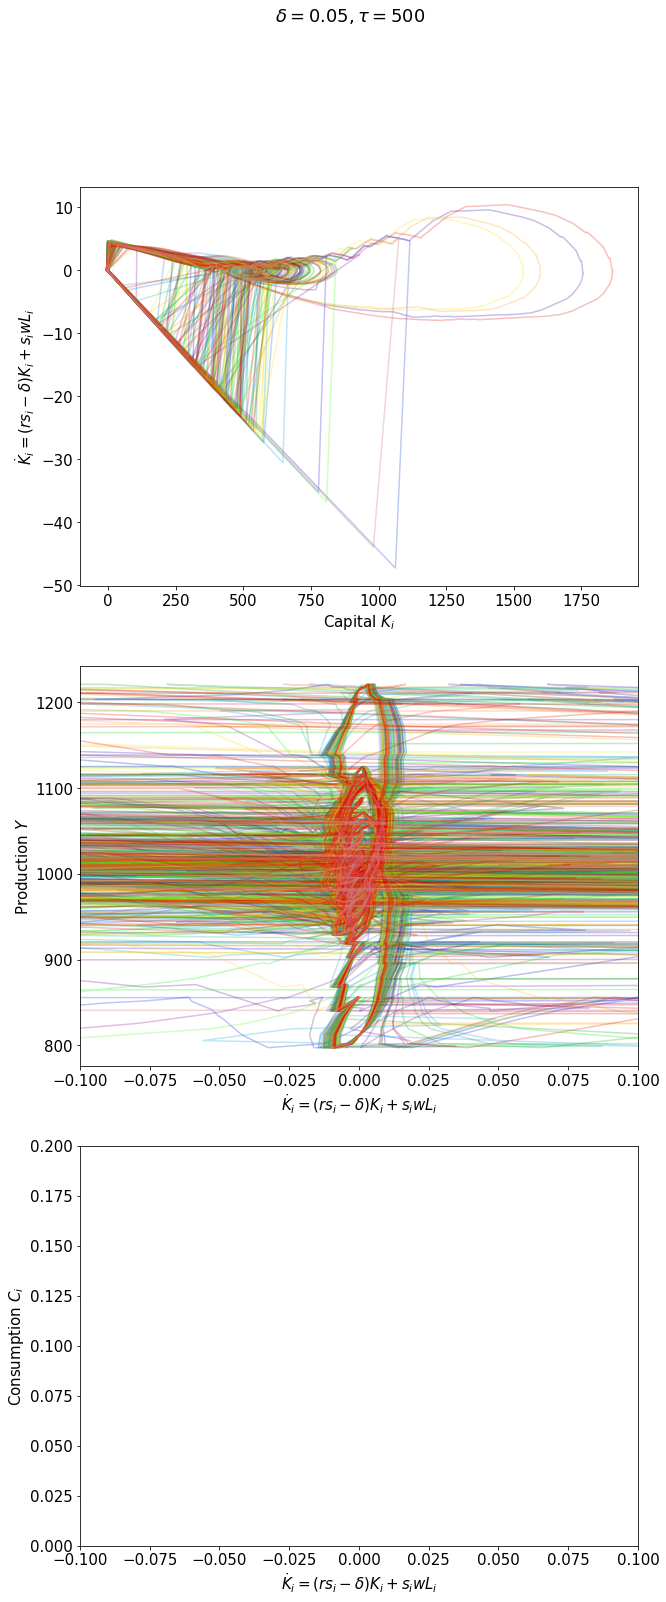

In [134]:
# phaseplots of all individual dynamics
plt.rc('font', size=15)  
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(10,25))
#fig.subplots_adjust(wspace=1.2);


plt.suptitle(r'$\delta=%s, \tau=%s$'%(np.round(delta/100.,2),tau))
start, stop = 2000,3000 # 1000,3000 # len(traj.index) - 250,len(traj.index) 
print start, stop
kidotzero = W[start:stop,:]/(((delta/100. )/S[start:stop,:]) -traj['r'].values[start:stop][:,None])
kidotzero/=N
kidotzero_low = kidotzero*(kidotzero<L)
kidotzero_high = kidotzero*(kidotzero>=L)

Lim=0.05

Nag=100
for a,i in enumerate(range(Nag)):
    kidot =  (traj['r'].values[start:stop] * S[start:stop,i] - delta/100.)*K[start:stop,i] +\
              traj['wage'].values[start:stop] * L[i]* S[start:stop,i]
    ax1.plot(K[start:stop,i] - 10,kidot,             
             c=plt.cm.spectral(float(a+1) / Nag), alpha=0.25);
    ax1.set_ylabel(r'$\dot{K}_i=(rs_i -\delta)K_i +s_iwL_i$')
    ax1.set_xlabel(r'Capital $K_i$')
    
    ax2.plot( kidot, 
             traj['Y'].values[start:stop],
             c=plt.cm.spectral(float(a+1) / Nag),alpha=0.25);
    ax2.set_xlabel(r'$\dot{K}_i=(rs_i -\delta)K_i +s_iwL_i$')
    ax2.set_ylabel(r'Production $Y$')
    
    ax3.plot(kidot, 
             C[start:stop,i],
             c=plt.cm.spectral(float(a+1) / Nag),alpha=0.25);
    ax3.set_xlabel(r'$\dot{K}_i=(rs_i -\delta)K_i +s_iwL_i$')
    ax3.set_ylabel(r'Consumption $C_i$')
#ax1.set_ylim((-0.1,.1))
ax2.set_xlim((-0.1,.1))
ax3.set_xlim((-0.1,.1))
ax3.set_ylim((0,0.2))
#     ax3.loglog(S[start:stop,i], C[start:stop,i],
#              c=plt.cm.spectral(float(a+1) / Nag), alpha=0.55);
#     ax3.set_ylabel(r'Consumption $C_i$')
#     ax3.set_xlabel(r'Capital $K_i$')
#ax1.set_yscale('log')
# ax2.plot(np.array(traj.index[start:stop])[np.nonzero(kidotzero_high)[0]],
#     kidotzero_high[np.nonzero(kidotzero_high)],
#     'kx',lw=3,label=r'$\dot{K}_i=0$');
# ax2.plot(np.array(traj.index[start:stop])[np.nonzero(kidotzero_low)[0]],
#     kidotzero_low[np.nonzero(kidotzero_low)],
#     'kx',lw=3,label=r'$\dot{K}_i=0$');
#ax2.set_yscale('log')
# #ax1.plot(traj.index[start:stop],S[start:stop,:].mean(1),label='mean');
# #ax1.legend();
# #ax1.plot(traj.index[start:stop],S[start:stop,:].mean(1),label='mean');
#ax1.set_xlim((-0.1,0.1))
# from collections import OrderedDict
# handles, labels = ax2.get_legend_handles_labels()
# by_label = OrderedDict(zip(labels, handles))
# ax2.legend(by_label.values(), by_label.keys(),loc='upper right',ncol=2)
# #ax2.set_yscale('log')
# ax2.set_ylim(0,9)

#fig.savefig('delta_%s_start%s_stop%s_trajectory_Ldist_tau500_phi01_eps01.pdf'%(delta,start,stop))


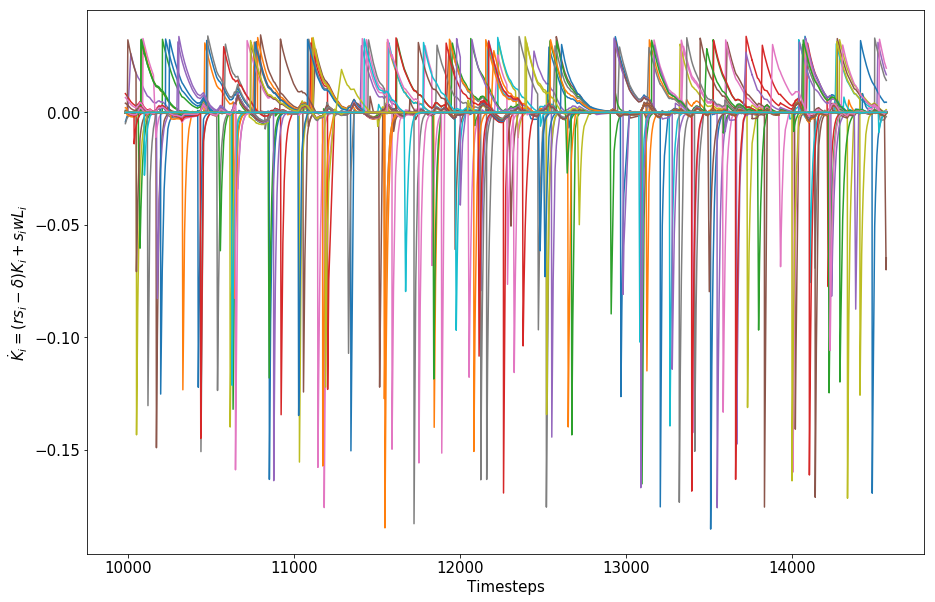

In [12]:
plt.rc('font', size=15)  

fig2=plt.figure(figsize=(15,10))
ax=fig2.add_subplot(111)

start,stop =2000, 3000#len(traj['Y'].values)
#ax.plot(traj['r'].values[start:stop], traj['Y'].values[start:stop], alpha=0.8)
#ax.plot((S[start:stop,:]* (S[start:stop,:] < 0.5)).sum(1) /(S[start:stop,:] < 0.5).sum(1),
#        (C[start:stop,:]* (S[start:stop,:] < 0.5)).sum(1) /(S[start:stop,:] < 0.5).sum(1),alpha=0.5)
#ax.plot(traj.index.values[start:stop],
#        ((traj['r'].values[start:stop][:,None] * S[start:stop,:] - delta/100.)*K[start:stop,:] +\
#              traj['wage'].values[start:stop][:,None] * L[:][None,:] * S[start:stop,:]))
#ax.plot((S[start:stop,:]* (S[start:stop,:] > 0.5)).sum(1) /(S[start:stop,:] > 0.5).sum(1) ,
#        (C[start:stop,:]* (S[start:stop,:] > 0.5)).sum(1) /(S[start:stop,:] > 0.5).sum(1),alpha=0.5)
#ax.plot((K[start:stop,:]*S[start:stop,:]).sum(1)/K[start:stop,:].sum(1), traj.Y.values[start:stop],'k',alpha=0.7)
#ax2=ax.twinx()
# y=((traj['r'].values[start:stop][:,None] * S[start:stop,:] - delta/100.)*K[start:stop,:] +\
#               traj['wage'].values[start:stop][:,None] * L[:][None,:] * S[start:stop,:]) 
# ax.plot(y.sum(1) +(delta/100) *K[start:stop,:].sum(1), traj['Y'].values[start:stop])
#ax.set_xlim((-0.1, 0.1))
#ax.set_ylabel(r'Aggreg. capital K')
ax.legend()
ax.set_xlabel('Timesteps')
ax.set_ylabel(r'$\dot{K}_i=(rs_i -\delta)K_i +s_iwL_i$')
#fig2.savefig('Kidot_vs_t_trajectory_Ldist_tau500_phi01_eps01.pdf')

#ax.plot(traj['Y'].values)
#ax.plot(traj['Y'].values[1:] - np.power(K[:,:].sum(1)[1:],0.5))

In [90]:
sum(y.ravel()<0)

40813

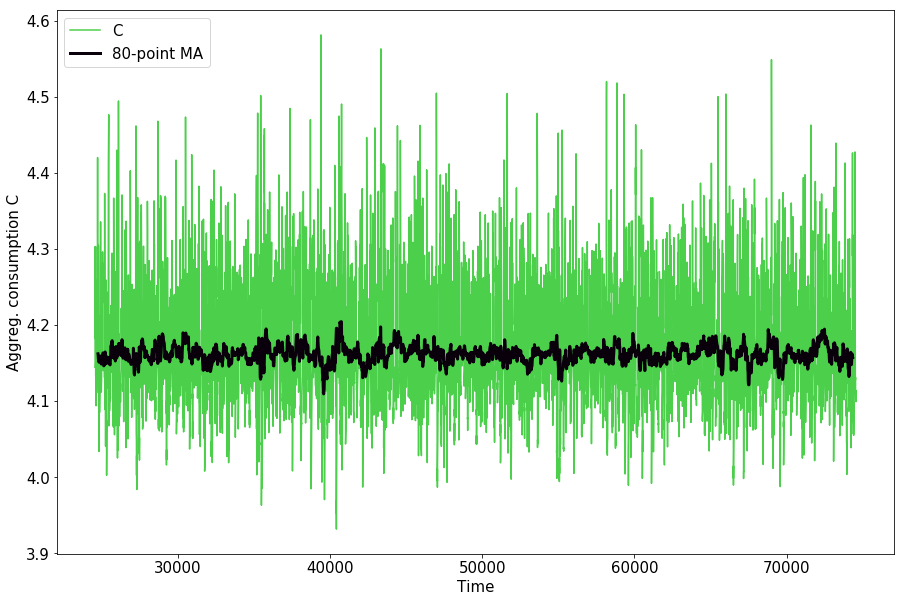

In [10]:
plt.rc('font', size=15)  

fig2=plt.figure(figsize=(15,10))
ax=fig2.add_subplot(111)

start,stop = 5000, 15000#len(traj['Y'].values)
ax.plot(traj.index[start:stop], C[start:stop,:].sum(1),c=plt.cm.spectral(2/4.),alpha=0.7,label=r'C')
MA=80
mov = np.convolve(C[start:stop,:].sum(1), np.ones((MA,))/MA,mode='valid')
ax.plot(traj.index[start+MA/2:stop-MA/2+1],mov, c=plt.cm.spectral(1),lw=3,label=r'%s-point MA'%MA)
ax.set_ylabel(r'Aggreg. consumption C')
ax.legend()
ax.set_xlabel('Time')
#fig2.savefig('C_vs_t_traj1.pdf')

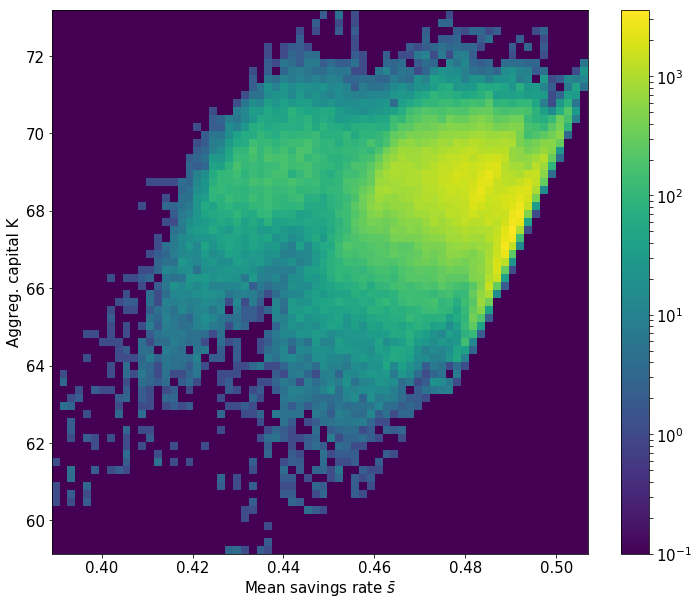

In [13]:
from matplotlib import colors # Phase-heatmaps of MAKRO Variables
fig=plt.figure(figsize=(12,10))
ax=fig.add_subplot(111)
start,stop = 30000, len(traj['Y'].values)
#ax.plot(S[start:stop,:].mean(1), traj['Y'].values[start:stop], alpha=0.8)
#ax.plot((K[start:stop,:]*S[start:stop,:]).sum(1)/K[start:stop,:].sum(1),
#        traj['Y'].values[start:stop])
if True:
#     heatmap, xedges, yedges = np.histogram2d(((traj['r'].values[start:stop][3] * S[start:stop,3] - delta/100.)*K[start:stop,3] +\
#               traj['wage'].values[start:stop] * L[3] * S[start:stop,3]), 
#                                                 K[start:stop,3], 
#                                                 bins=[68,68])
    heatmap, xedges, yedges = np.histogram2d((S[start:stop,:] ).mean(1), 
                                                K[start:stop,:].sum(1), 
                                                bins=[68,68])
    heatmap+= 0.1
    c = ax.pcolormesh(xedges, yedges, heatmap.T,norm=colors.LogNorm(vmin=heatmap.min(), vmax=heatmap.max()))
    plt.colorbar(c)
    ax.set_ylabel('Aggreg. capital K')
    ax.set_xlabel(r'Mean savings rate $\bar{s}$')
    
    #fig.savefig('K_vs_s_Ldist_tau500_phi20_eps05.pdf')
else:
    heatmap, xedges, yedges = np.histogram2d((K[start:stop,:]*S[start:stop,:]).sum(1)/K[start:stop,:].sum(1), 
                                            K[start:stop,:].sum(1), 
                                                bins=[68,68])
    heatmap+= 0.1
    c = ax.pcolormesh(xedges, yedges, heatmap.T,norm=colors.LogNorm(vmin=heatmap.min(), vmax=heatmap.max()))
    plt.colorbar(c)
    ax.set_ylabel('Aggreg. capital  K')
    ax.set_xlabel(r'Mean savings rate $\bar{s}$')
    #fig.savefig('K_vs_smean_ext_alpha08.pdf')

In [48]:
(traj['r'].values[start:stop][:,None] * S[start:stop,:] - delta/100)

array([[  2.96337759e-04,   6.04430442e-04,   4.23605229e-02, ...,
          1.06389460e-06,   2.16435654e-04,   4.24737380e-02],
       [  2.98333107e-04,   6.08500288e-04,   4.26457514e-02, ...,
          1.07105818e-06,   2.17892992e-04,   4.27597288e-02],
       [  3.00006790e-04,   6.11914045e-04,   4.28849990e-02, ...,
          1.07706694e-06,   2.19115397e-04,   4.29996158e-02],
       ..., 
       [  4.34159295e-02,   2.15401210e-03,   2.80172880e-03, ...,
          4.48242502e-02,   4.00581477e-04,   7.45239108e-04],
       [  4.30168725e-02,   2.13421352e-03,   2.77597674e-03, ...,
          4.44122486e-02,   3.96899537e-04,   7.38389250e-04],
       [  4.26845540e-02,   2.11772607e-03,   2.75453148e-03, ...,
          4.40691504e-02,   3.93833367e-04,   7.32684968e-04]])

In [53]:
heatmap.max()

184.09999999999999

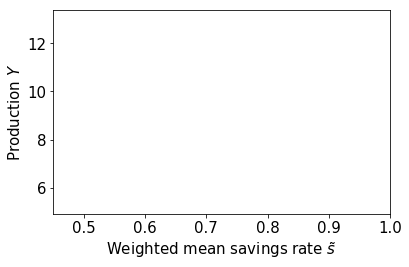

In [32]:
# animate some MAKRO variables

#ax.plot(traj['Y'].values[start:stop], traj['r'].values[start:stop])
import matplotlib.animation as animation
from IPython.display import HTML
plt.rcParams['animation.html'] = 'html5'
import matplotlib.colors as colors

start, stop = 4000, 6000
fig, (ax) = plt.subplots()
ax.set_xlabel(r'Weighted mean savings rate $\tilde{s}$')


ax.set_ylabel(r'Production $Y$')
fig.tight_layout()
#ax.set_prop_cycle(color= [plt.cm.spectral(k) for k in np.linspace(0,1,n_agents)])

# ax2.set_xlabel(r'Savings rate $s_i$')
# ax2.set_xlim((0,1))
# ax2.set_ylim((0,100))

n_points=100
def animate(i):
    for line in lines:
        #line.set_data(S[start+i-n_points:start+i,:].mean(1), traj['Y'].values[start+i-n_points:start+i])
        line.set_data((K[start+i-n_points:start+i,:]*S[start+i-n_points:start+i,:]).sum(1)/\
                      K[start+i-n_points:start+i,:].sum(1),traj['Y'].values[start+i-n_points:start+i])
        line.set_color('k')
        line.set_marker('x')
        line.set_linestyle('-')
            
    return tuple(lines)

def init():
    for a, line in enumerate(lines):
        line.set_data([],[])
        line.set_marker('x')
        line.set_markersize(5)
        line.set_linestyle('--')
        #line.set_markeredgecolor('%s')
        #line.set_color(plt.cm.spectral((a+1) / float(n_agents)))
    
    return lines

lines=[]
lobj = ax.plot([],[],
              color=plt.cm.spectral((k+1.) / n_agents) )[0]
lines.append(lobj)
    
#x = S[start,:n_agents]
#line, = ax.plot(x, K[start,:n_agents])
# ax.set_xlim(( 0, np.max(S[start-n_points:stop,:].mean(1)+0.05)))
# ax.set_ylim((traj['Y'].values[start-n_points:stop].min(), 
#              traj['Y'].values[start-n_points:stop].max()+0.5 ))
ax.set_xlim(( 0.45, 1))
ax.set_ylim((traj['Y'].values[start-n_points:stop].min(), 
             traj['Y'].values[start-n_points:stop].max()+0.5 ))

#ax.set_yscale('log')
#ax.legend([r'$\dot{K}_i=0$'],loc = 'lower right')
ani = animation.FuncAnimation(fig, animate, np.arange(start, stop), init_func=init,
                              interval=50, blit=True)
#HTML(ani.to_html5_video())

/home/yuki/anaconda2/envs/env_full2/lib/python2.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in divide


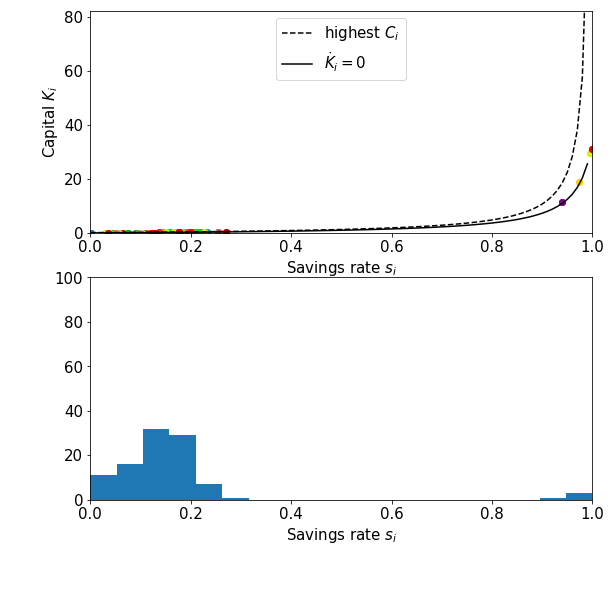

In [46]:
ani.save('eps05_phi05_31500-33500.mp4')

/home/yuki/anaconda2/envs/env_full2/lib/python2.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in divide


/home/yuki/anaconda2/envs/env_full2/lib/python2.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in divide


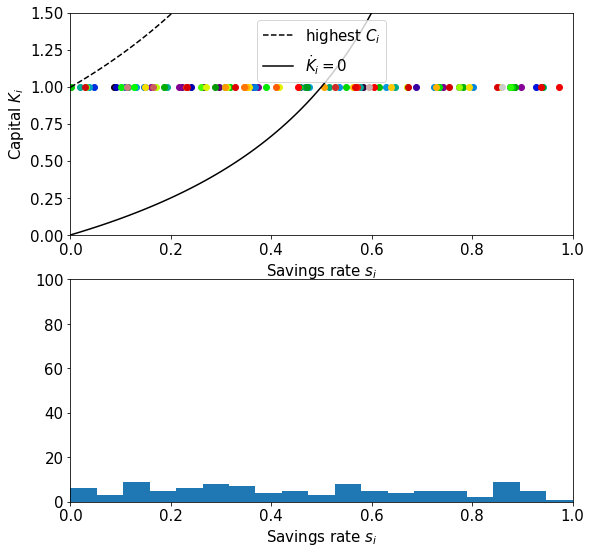

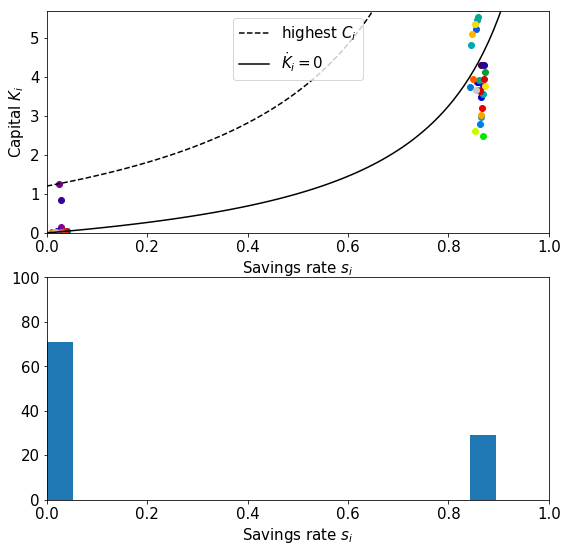

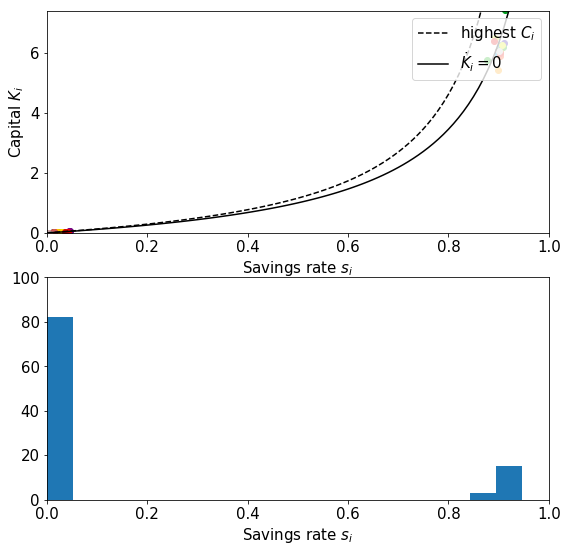

In [76]:
a=[3,1,4]
a[1:2]

[1]

In [ ]:
#### for plotting single households ####

plt.rc('font', size=15)  
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,figsize=(15,10))
plt.suptitle(r'$\delta=%s, \tau=%s$'%(np.round(delta/100.,2),tau))
start, stop = 0,5000#len(traj.index) - 250,len(traj.index) 
print start, stop
kidotzero = W[start:stop,:]/(((delta/100. )/S[start:stop,:]) -traj['r'].values[start:stop][:,None])
kidotzero/=N
kidotzero_low = kidotzero*(kidotzero<L)
kidotzero_high = kidotzero*(kidotzero>=L)

L=0.05


n=4
for a,i in enumerate([3,5,7]):
    ax1.plot(traj.index[start:stop],S[start:stop,i], 
             c=plt.cm.spectral(float(a+1) / n),label='Househ. %s'%i)#, alpha=0.955);
    ax1.set_ylabel(r'Savings rate $s_i$')
    ax2.plot(traj.index[start:stop],K[start:stop,i], 
             c=plt.cm.spectral(float(a+1) / n),label='Househ. %s'%i)#,alpha=0.955);
    ax2.set_ylabel(r'Capital $K_i$')
    ax3.plot(traj.index[start:stop],C[start:stop,i], 
             c=plt.cm.spectral(float(a+1) / n),label='Househ. %s'%i)#,alpha=0.955);
    ax3.set_ylabel(r'Consumption $C_i$')
ax1.legend()
ax3.legend()
ax2.plot(np.array(traj.index[start:stop])[np.nonzero(kidotzero_high)[0]],
     kidotzero_high[np.nonzero(kidotzero_high)],
     'k',lw=3,label=r'$\dot{K}_i=0$');
ax2.plot(np.array(traj.index[start:stop])[np.nonzero(kidotzero_low)[0]],
     kidotzero_low[np.nonzero(kidotzero_low)],
     'k',lw=3,label=r'$\dot{K}_i=0$');
#ax1.plot(traj.index[start:stop],S[start:stop,:].mean(1),label='mean');
#ax1.legend();
#ax1.plot(traj.index[start:stop],S[start:stop,:].mean(1),lael='mean');

from collections import OrderedDict
handles, labels = ax2.get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
ax2.legend(by_label.values(), by_label.keys(),loc='upper right',ncol=2)
ax2.set_yscale('log')
#ax2.set_ylim(0,9)

ax4.plot(traj.index[start:stop],K[start:stop,:].sum(1),c='b');
ax4.set_ylabel('Aggreg. K')

ax5 = ax4.twinx();
ax5.plot(traj.index[start:stop],traj['r'].values[start:stop],c='g');
ax5.plot(traj.index[start:stop],delta/100. +0*traj.index[start:stop],
         'k--',label=r'$\delta$');
ax5.legend(loc='upper right')
ax5.set_ylabel('Interest rate')
ax5.tick_params(axis='y', colors='g')
ax4.tick_params(axis='y', colors='b')
ax4.set_xlabel('timesteps')
fig.savefig('delta_%s_start%s_stop%s_three.pdf'%(delta,start,stop))


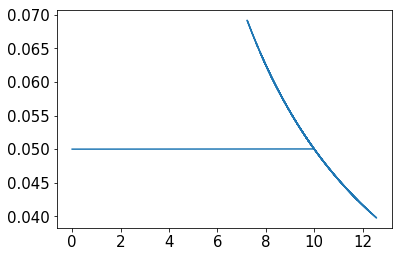

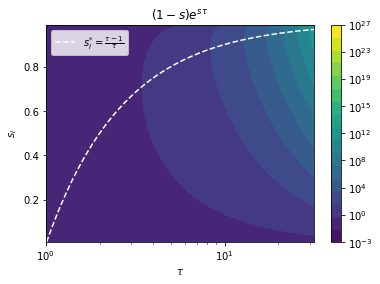

In [13]:
# try (1-s)exp(s tau)

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from matplotlib import colors, ticker
u = np.linspace(0.01, 0.99, 100) # savings rate
v = np.logspace(0.001, 1.5, 100) # tau
X, Y = np.meshgrid(u, v)
a=1.0
b=0
k0=1.
Z = (1-X)*k0*np.exp((a*X - b)*Y)

fig2=plt.figure()
ax=fig2.add_subplot(111)
c = ax.contourf(Y, X, Z, zdir='z', norm=colors.LogNorm(),
                levels=np.logspace(int(np.log(np.min(Z))),int(np.log(np.max(Z))),18))
ax.plot( k0/(a*(1.-u)),u,'w--',label=r'$s_i^{*}=\frac{\tau -1}{\tau}$')
ax.legend()

cb = plt.colorbar(c)
cb.set_ticks(np.logspace(int(np.log(np.min(Z))),int(np.log(np.max(Z))),9))
cb.set_ticklabels(np.logspace(int(np.log(np.min(Z))),int(np.log(np.max(Z))),9))
def fmt(x, pos):
    a, b = '{:.0e}'.format(x).split('e')
    b = int(b)
    return r'$ 10^{{{}}}$'.format(b)

cb.formatter = ticker.FuncFormatter(fmt)
cb.update_ticks()

ax.set_xlabel(r'$\tau$')
ax.set_ylabel(r'$s_i$')
ax.set_title(r'$(1-s)e^{s\tau}$')
ax.set_xlim(min(v),max(v))
ax.set_xscale('log')
#fig2.savefig('C_hat.pdf')

plt.show()


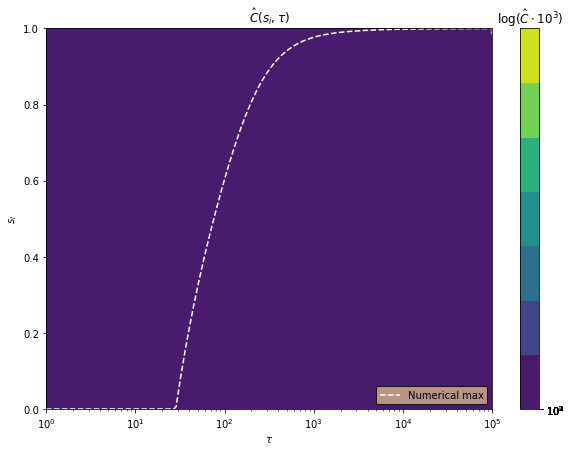

In [19]:

# via the accurate form of C_hat
# try (1-s)exp(s tau)

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from matplotlib import colors, ticker
from scipy.optimize import root, fsolve,brentq,minimize,fminbound
%matplotlib inline


u = np.linspace(1e-9, 1., 100) # savings rate
taus = np.logspace(0, 5, 200)  # tau
S, T = np.meshgrid(u, taus)

w = 4.5
r = 0.055
alpha = 0.5
li= 1/100.
delta = 0.05
ko=1.
tau=1
def c_hat(s,tau):

    D = r - delta/s
    gm = D * r *ko + w *li*r
    return (1.-s)*((r*ko + w*r*li/D)*np.exp(s*D*tau) + w*li*(1.-r/D))

def c_hat_neg(s):

    D = r - delta/s
    gm = D * r *ko + w *li*r
    return -(1.-s)*((r*ko + w*r*li/D)*np.exp(s*D*tau) + w*li*(1.-r/D))

# def dc(s):
#     D = r - delta/s
#     gm = D * r *ko + w *li*r
#     return s*gm*np.exp(s*D*tau)*(1.-(1.-s)*r*tau) -delta +(1.-s)*(np.exp(s*D*tau)-1)* w*li *r *delta/(s*D)
 
Z= c_hat(S,T)
#Z=S.copy()
#for a,tt in enumerate(taus):
#    Z[a,:]= c_(u,tt)
#Z = (1-X)*k0*np.exp((a*X - b)*Y)
sroot=[]
for tau in taus:
    sroot.append(fminbound(c_hat_neg,1e-9,1., maxfun=10000,xtol=1e-12 ))# bounds=(1e-4,1.) ).x)#, method ='L-BFGS-B',tol=1e-12,
                        #options={'maxiter':5000000} ).x) # slsqp, tnc, L-BFGS-
fig2=plt.figure(figsize=(10,7))
ax=fig2.add_subplot(111)
#Z=Z*(Z>0)
c = ax.contourf(T, S, Z*1000, zdir='z')#,norm=colors.LogNorm(),levels=np.logspace(.8,18))
ax.plot(taus, sroot,'w--',label='Numerical max')

cb = plt.colorbar(c)
cb.set_ticks(np.logspace(.8,3,9))
cb.set_ticklabels(np.logspace(.8,3,9))
def fmt(x, pos):
    a, b = '{:.0e}'.format(x).split('e')
    b = int(b)
    return r'$ 10^{{{}}}$'.format(b)

cb.formatter = ticker.FuncFormatter(fmt)
cb.update_ticks()
cb.ax.set_title(r'$\log( \hat{C}\cdot 10^3 )$')
ll= ax.legend(loc='lower right')
frame= ll.get_frame()
frame.set_facecolor('tan')
frame.set_edgecolor('black')
ax.set_xlabel(r'$\tau$')
ax.set_ylabel(r'$s_i$')
ax.set_title(r'$\hat{C}(s_i,\tau)$')
ax.set_ylim(min(u),max(u))
ax.set_xscale('log')
#fig2.savefig('C_hat_numericmax.pdf')

[0.99999998487941089, 0.99999998487941089, 0.99999998487941089, 0.99999998487941089, 0.99999998487941089, 0.99999998487941089, 0.99999998487941089, 0.99999998487941089, 0.99999998487941089, 0.99999998487941089, 0.99999998487941089, 0.99999998487941089, 0.99999998487941089, 0.99999998487941089, 0.99999998487941089, 0.99999998487941089, 0.99999998487941089, 0.99999998487941089, 0.99999998487941089, 0.99999998487941089, 0.99999998487941089, 0.99999998487941089, 0.99999998487941089, 0.99999998487941089, 0.99999998487941089, 0.99999998487941089, 0.99999998487941089, 0.99999998487941089, 0.99999998487941089, 0.99999998487941089, 0.99999998487941089, 0.99999998487941089, 0.99999998487941089, 0.99999998487941089, 0.99999998487941089, 0.99999998487941089, 0.99999998487941089, 0.99999998487941089, 0.99999998487941089, 0.99999998487941089, 0.99999998487941089, 0.99999998487941089, 0.99999998487941089, 0.99999998487941089, 0.99999998487941089, 0.99999998487941089, 0.99999998487941089, 0.9999999848

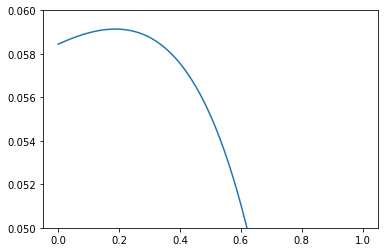

In [6]:
plt.plot(u, c_(u,40))
plt.ylim((0.05,0.06))
print sroot